<a href="https://colab.research.google.com/github/Twistovni/INTELIG-NCIA-ARTIFICIAL-APLICADA/blob/main/IA_APLICADA_Aula3_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
!pip install timm
!pip install transformers evaluate datasets

In [ ]:
!pip -q install -U transformers accelerate timm  transformers torch  requests


In [ ]:
!pip install "Pillow==10.3.0"

# Classificação com Transformers

In [ ]:
import requests
import torch
from PIL import Image
from transformers import *
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"


In [ ]:
device

'cuda'

Carregando Modelo

In [ ]:
# model
model_name = "google/vit-base-patch16-224"
# image processor
image_processor = ViTImageProcessor.from_pretrained(model_name)
# model pré treinado
model = ViTForImageClassification.from_pretrained(model_name).to(device)

loading configuration file preprocessor_config.json from cache at /root/.cache/huggingface/hub/models--google--vit-base-patch16-224/snapshots/3f49326eb077187dfe1c2a2bb15fbd74e6ab91e3/preprocessor_config.json
size should be a dictionary on of the following set of keys: ({'width', 'height'}, {'shortest_edge'}, {'shortest_edge', 'longest_edge'}, {'longest_edge'}, {'max_width', 'max_height'}), got 224. Converted to {'height': 224, 'width': 224}.
Image processor ViTImageProcessor {
  "do_convert_rgb": null,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--google--vit-base-patch16-224/snapshots/3f49326eb077187dfe1c2a2bb15fbd74e6ab91e

Loading weights:   0%|          | 0/200 [00:00<?, ?it/s]

# função auxiliar para carregar image do path ou URL

In [ ]:
import urllib.parse as parse
import os

# Carregar de url
def is_url(string):
    try:
        result = parse.urlparse(string)
        return all([result.scheme, result.netloc, result.path])
    except:
        return False

# Carregar do path
def load_image(image_path):
    if is_url(image_path):
        return Image.open(requests.get(image_path, stream=True).raw)
    elif os.path.exists(image_path):
        return Image.open(image_path)

# função para realizar a predição

In [ ]:
def get_prediction(model, url_or_path):
  # carregar imagem
  img = load_image(url_or_path)
  print(type(img))
  # preprocessing
  pixel_values = image_processor(img, return_tensors="pt")["pixel_values"].to(device)
  # inferencia
  print(type(pixel_values))
  output = model(pixel_values)
  # label id -- class name
  return model.config.id2label[int(output.logits.softmax(dim=1).argmax())]

chamando função de predição

In [ ]:
get_prediction(model, "http://images.cocodataset.org/test-stuff2017/000000000128.jpg")


<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'torch.Tensor'>


'Indian elephant, Elephas maximus'

In [ ]:
get_prediction(model, "https://as2.ftcdn.net/v2/jpg/03/03/62/45/1000_F_303624505_u0bFT1Rnoj8CMUSs8wMCwoKlnWlh5Jiq.jpg")

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'torch.Tensor'>


'tabby, tabby cat'

# Detecção de objetos - com transformers pipeline

* Modelo Facebook resnet facebook/detr-resnet-50

# obtendo resultado da detecção de objetos


In [ ]:
from transformers import AutoImageProcessor
from transformers import AutoModelForObjectDetection
import torch

from transformers import pipeline
import requests
from PIL import Image


In [ ]:
url = "https://c8.alamy.com/comp/2GM6T8B/medic-of-african-ethnicity-helping-sick-patient-at-clinic-in-hospital-ward-doctor-using-medical-equipment-and-technology-for-young-woman-healthcare-and-treatment-black-person-in-bed-2GM6T8B.jpg"
image = Image.open(requests.get(url, stream=True).raw)

#obj_detector = pipeline("object-detection", model="facebook/detr-resnet-50")
obj_detector = pipeline("object-detection", model="devonho/detr-resnet-50_finetuned_cppe5")

obj_detector(image)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--devonho--detr-resnet-50_finetuned_cppe5/snapshots/a6b19af515640adfb51492b40b59e498e71e3170/config.json
Model config DetrConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "architectures": [
    "DetrForObjectDetection"
  ],
  "attention_dropout": 0.0,
  "auxiliary_loss": false,
  "backbone_config": {
    "backbone": "resnet50",
    "features_only": true,
    "freeze_batch_norm_2d": false,
    "model_type": "timm_backbone",
    "num_channels": 3,
    "out_features": null,
    "out_indices": [
      1,
      2,
      3,
      4
    ],
    "output_stride": null,
    "use_pretrained_backbone": false
  },
  "bbox_cost": 5,
  "bbox_loss_coefficient": 5,
  "class_cost": 1,
  "d_model": 256,
  "decoder_attention_heads": 8,
  "decoder_ffn_dim": 2048,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "dice_loss_coefficient": 1,
  "dropout": 0.1,
  "dtype": "float32",
  "encoder_atte

Loading weights:   0%|          | 0/530 [00:00<?, ?it/s]

Safetensors PR exists
DetrForObjectDetection LOAD REPORT from: devonho/detr-resnet-50_finetuned_cppe5
Key                                                            | Status     |  | 
---------------------------------------------------------------+------------+--+-
model.backbone.model.layer1.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer4.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer3.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer2.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--devonho--detr-resnet-50_finetuned_cppe5/snapshots/a6b19af515640adfb51492b40b59e498e71e3170/config.json
Model config DetrConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "a

[{'score': 0.8870376944541931,
  'label': 'Mask',
  'box': {'xmin': 501, 'ymin': 203, 'xmax': 624, 'ymax': 324}},
 {'score': 0.9310327768325806,
  'label': 'Mask',
  'box': {'xmin': 656, 'ymin': 421, 'xmax': 777, 'ymax': 541}},
 {'score': 0.828434944152832,
  'label': 'Coverall',
  'box': {'xmin': 234, 'ymin': 261, 'xmax': 790, 'ymax': 867}}]

In [ ]:
image_processor = AutoImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = AutoModelForObjectDetection.from_pretrained("facebook/detr-resnet-50")

loading configuration file preprocessor_config.json from cache at /root/.cache/huggingface/hub/models--facebook--detr-resnet-50/snapshots/1d5f47bd3bdd2c4bbfa585418ffe6da5028b4c0b/preprocessor_config.json
loading configuration file preprocessor_config.json from cache at /root/.cache/huggingface/hub/models--facebook--detr-resnet-50/snapshots/1d5f47bd3bdd2c4bbfa585418ffe6da5028b4c0b/preprocessor_config.json
Image processor DetrImageProcessorFast {
  "data_format": "channels_first",
  "do_convert_annotations": true,
  "do_normalize": true,
  "do_pad": true,
  "do_rescale": true,
  "do_resize": true,
  "format": "coco_detection",
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "DetrImageProcessorFast",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "longest_edge": 1333,
    "shortest_edge": 800
  }
}

loading configuration file config.json from cache at /root/.cache/huggingface/

Loading weights:   0%|          | 0/530 [00:00<?, ?it/s]

DetrForObjectDetection LOAD REPORT from: facebook/detr-resnet-50
Key                                                            | Status     |  | 
---------------------------------------------------------------+------------+--+-
model.backbone.model.layer1.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer4.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer3.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer2.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [ ]:
with torch.no_grad():
    inputs = image_processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    target_sizes = torch.tensor([image.size[::-1]])
    results = image_processor.post_process_object_detection(outputs, threshold=0.5, target_sizes=target_sizes)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

Detected cell phone with confidence 0.59 at location [1047.19, 739.21, 1124.03, 772.03]
Detected bed with confidence 0.944 at location [825.23, 730.9, 1298.36, 875.81]
Detected chair with confidence 0.971 at location [917.42, 603.0, 1099.05, 740.23]
Detected tv with confidence 0.652 at location [-0.59, 192.58, 223.67, 509.13]
Detected person with confidence 0.983 at location [223.85, 17.18, 1067.95, 869.02]
Detected person with confidence 0.968 at location [584.03, 306.9, 1072.74, 855.15]


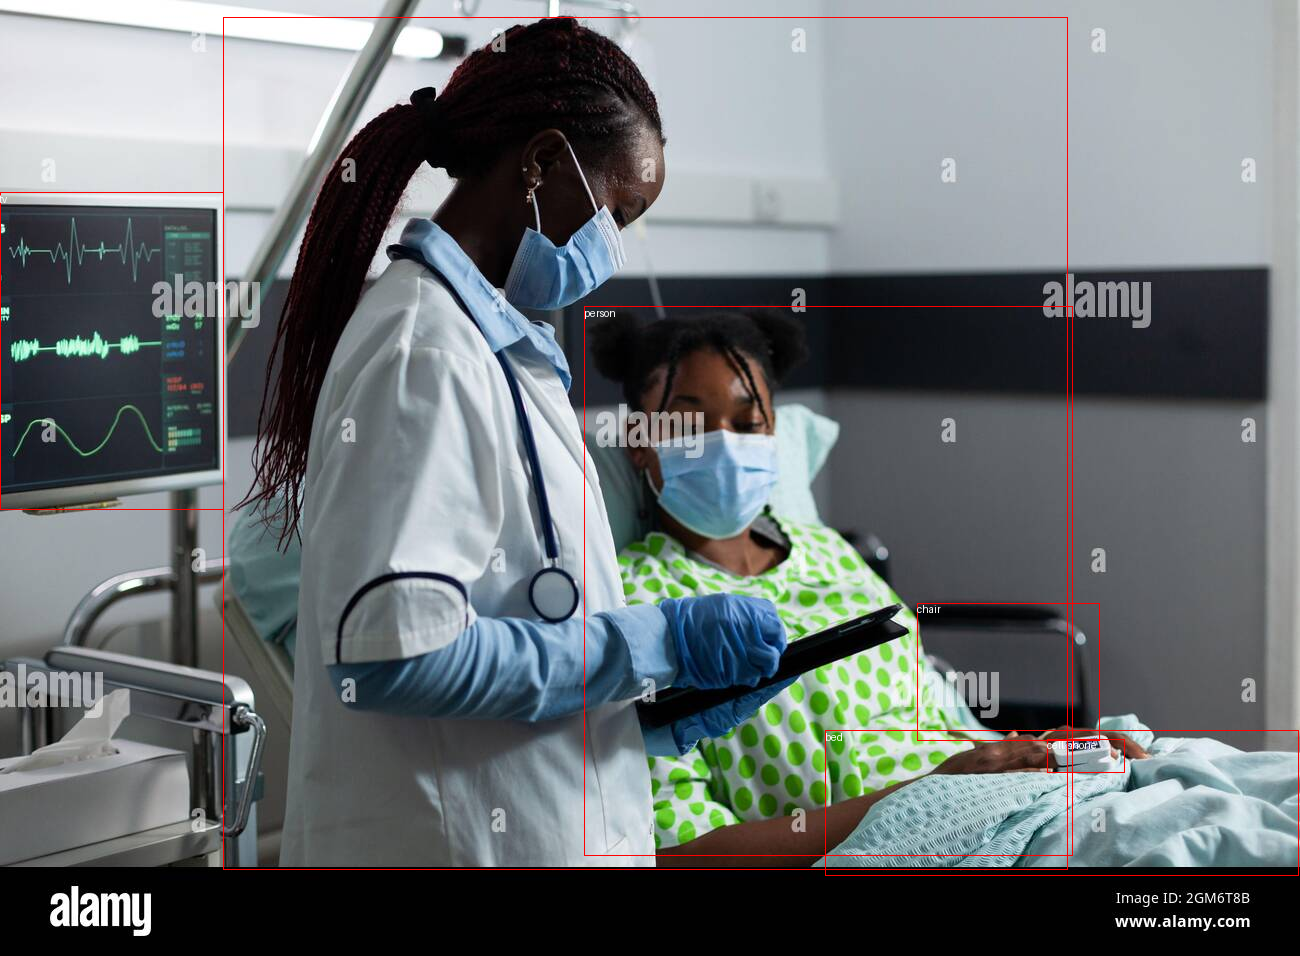

In [ ]:
from PIL import *
draw = ImageDraw.Draw(image)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    x, y, x2, y2 = tuple(box)
    draw.rectangle((x, y, x2, y2), outline="red", width=1)
    draw.text((x, y), model.config.id2label[label.item()], fill="white")

image

# Modelo treinado para equipamentos médicos devonho/detr-resnet-50_finetuned_cppe5
* Medical Personal Protective Equipment Dataset

In [ ]:
from transformers import pipeline
import requests
from PIL import Image


url = "https://c8.alamy.com/comp/2GM6T8B/medic-of-african-ethnicity-helping-sick-patient-at-clinic-in-hospital-ward-doctor-using-medical-equipment-and-technology-for-young-woman-healthcare-and-treatment-black-person-in-bed-2GM6T8B.jpg"
image = Image.open(requests.get(url, stream=True).raw)

#obj_detector = pipeline("object-detection", model="facebook/detr-resnet-50")
obj_detector = pipeline("object-detection", model="devonho/detr-resnet-50_finetuned_cppe5")

obj_detector(image)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--devonho--detr-resnet-50_finetuned_cppe5/snapshots/a6b19af515640adfb51492b40b59e498e71e3170/config.json
Model config DetrConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "architectures": [
    "DetrForObjectDetection"
  ],
  "attention_dropout": 0.0,
  "auxiliary_loss": false,
  "backbone_config": {
    "backbone": "resnet50",
    "features_only": true,
    "freeze_batch_norm_2d": false,
    "model_type": "timm_backbone",
    "num_channels": 3,
    "out_features": null,
    "out_indices": [
      1,
      2,
      3,
      4
    ],
    "output_stride": null,
    "use_pretrained_backbone": false
  },
  "bbox_cost": 5,
  "bbox_loss_coefficient": 5,
  "class_cost": 1,
  "d_model": 256,
  "decoder_attention_heads": 8,
  "decoder_ffn_dim": 2048,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "dice_loss_coefficient": 1,
  "dropout": 0.1,
  "dtype": "float32",
  "encoder_atte

Loading weights:   0%|          | 0/530 [00:00<?, ?it/s]

DetrForObjectDetection LOAD REPORT from: devonho/detr-resnet-50_finetuned_cppe5
Key                                                            | Status     |  | 
---------------------------------------------------------------+------------+--+-
model.backbone.model.layer1.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer4.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer3.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer2.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--devonho--detr-resnet-50_finetuned_cppe5/snapshots/a6b19af515640adfb51492b40b59e498e71e3170/config.json
Model config DetrConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "architectures": [
    "

[{'score': 0.8870376944541931,
  'label': 'Mask',
  'box': {'xmin': 501, 'ymin': 203, 'xmax': 624, 'ymax': 324}},
 {'score': 0.9310327768325806,
  'label': 'Mask',
  'box': {'xmin': 656, 'ymin': 421, 'xmax': 777, 'ymax': 541}},
 {'score': 0.828434944152832,
  'label': 'Coverall',
  'box': {'xmin': 234, 'ymin': 261, 'xmax': 790, 'ymax': 867}}]

# Modelo equipamentos médicos

In [ ]:
image_processor = AutoImageProcessor.from_pretrained("devonho/detr-resnet-50_finetuned_cppe5")
model = AutoModelForObjectDetection.from_pretrained("devonho/detr-resnet-50_finetuned_cppe5")


loading configuration file preprocessor_config.json from cache at /root/.cache/huggingface/hub/models--devonho--detr-resnet-50_finetuned_cppe5/snapshots/a6b19af515640adfb51492b40b59e498e71e3170/preprocessor_config.json
loading configuration file preprocessor_config.json from cache at /root/.cache/huggingface/hub/models--devonho--detr-resnet-50_finetuned_cppe5/snapshots/a6b19af515640adfb51492b40b59e498e71e3170/preprocessor_config.json
Image processor DetrImageProcessorFast {
  "data_format": "channels_first",
  "do_convert_annotations": true,
  "do_normalize": true,
  "do_pad": true,
  "do_rescale": true,
  "do_resize": true,
  "format": "coco_detection",
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "DetrImageProcessorFast",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "longest_edge": 1333,
    "shortest_edge": 800
  }
}

loading configuration file config.json from cach

Loading weights:   0%|          | 0/530 [00:00<?, ?it/s]

DetrForObjectDetection LOAD REPORT from: devonho/detr-resnet-50_finetuned_cppe5
Key                                                            | Status     |  | 
---------------------------------------------------------------+------------+--+-
model.backbone.model.layer1.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer4.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer3.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer2.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


# parametro threshold define confiança mínimo para considerar objeto detectado

In [ ]:

with torch.no_grad():
    inputs = image_processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    target_sizes = torch.tensor([image.size[::-1]])
    results = image_processor.post_process_object_detection(outputs, threshold=0.5, target_sizes=target_sizes)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )


Detected Mask with confidence 0.887 at location [501.75, 203.05, 624.25, 324.16]
Detected Mask with confidence 0.931 at location [656.49, 421.05, 777.26, 541.21]
Detected Coverall with confidence 0.828 at location [235.0, 261.42, 790.57, 867.84]


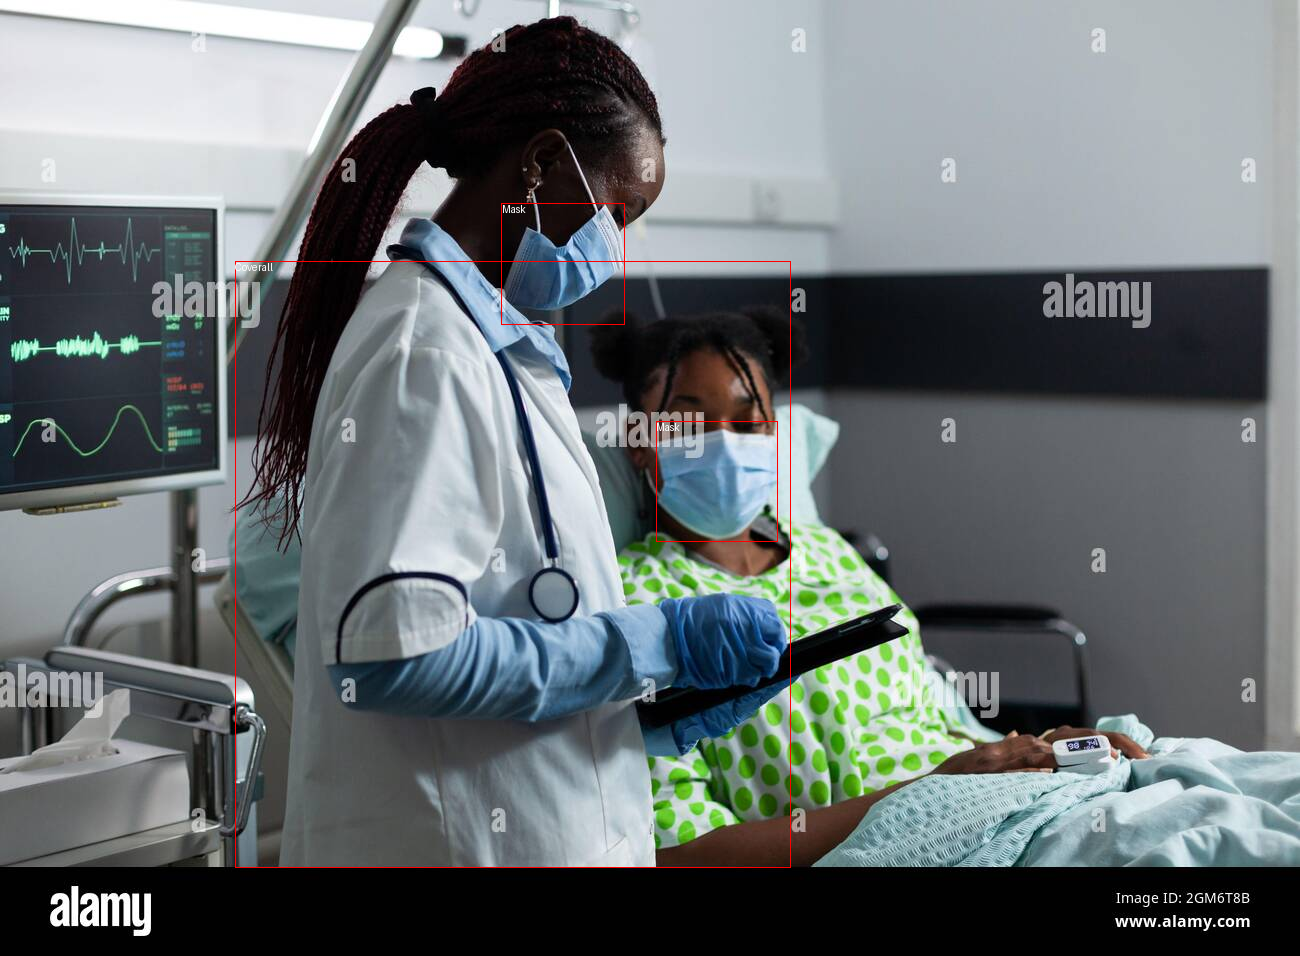

In [ ]:
from PIL import *
draw = ImageDraw.Draw(image)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    x, y, x2, y2 = tuple(box)
    draw.rectangle((x, y, x2, y2), outline="red", width=1)
    draw.text((x, y), model.config.id2label[label.item()], fill="white")

image

In [ ]:
from transformers import pipeline

checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--google--owlvit-base-patch32/snapshots/cbc355fb364588351c5d51c7f74465e8e7ec6f72/config.json
`text_config` is `None`. initializing the `OwlViTTextConfig` with default values.
`vision_config` is `None`. initializing the `OwlViTVisionConfig` with default values.
Model config OwlViTConfig {
  "architectures": [
    "OwlViTForObjectDetection"
  ],
  "dtype": "float32",
  "initializer_factor": 1.0,
  "logit_scale_init_value": 2.6592,
  "model_type": "owlvit",
  "projection_dim": 512,
  "text_config": {
    "add_cross_attention": false,
    "attention_dropout": 0.0,
    "bos_token_id": 0,
    "cross_attention_hidden_size": null,
    "decoder_start_token_id": null,
    "dropout": 0.0,
    "eos_token_id": 2,
    "finetuning_task": null,
    "hidden_act": "quick_gelu",
    "hidden_size": 512,
    "initializer_factor": 1.0,
    "initializer_range": 0.02,
    "intermediate_size": 2048,
    "is_decoder": false,

Loading weights:   0%|          | 0/412 [00:00<?, ?it/s]

OwlViTForObjectDetection LOAD REPORT from: google/owlvit-base-patch32
Key                                         | Status     |  | 
--------------------------------------------+------------+--+-
owlvit.text_model.embeddings.position_ids   | UNEXPECTED |  | 
owlvit.vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--google--owlvit-base-patch32/snapshots/cbc355fb364588351c5d51c7f74465e8e7ec6f72/config.json
`text_config` is `None`. initializing the `OwlViTTextConfig` with default values.
`vision_config` is `None`. initializing the `OwlViTVisionConfig` with default values.
Model config OwlViTConfig {
  "architectures": [
    "OwlViTForObjectDetection"
  ],
  "dtype": "float32",
  "initializer_factor": 1.0,
  "logit_scale_init_value": 2.6592,
  "model_type": "owlvit",
  "project

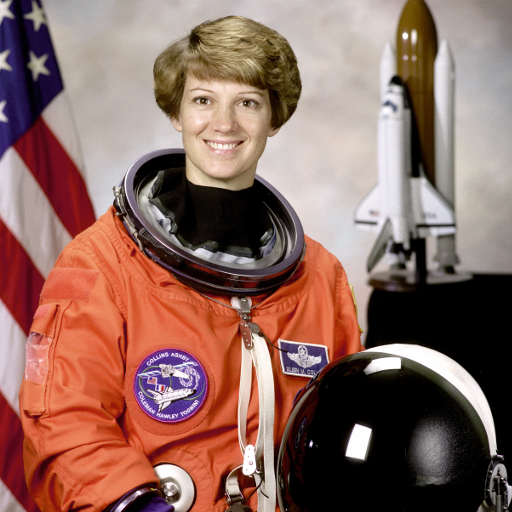

In [ ]:
import skimage
import numpy as np
from PIL import Image

image = skimage.data.astronaut()
image = Image.fromarray(np.uint8(image)).convert("RGB")

image

In [ ]:
#strftime("%Y-%m-%d %H:%M:%S", gmtime())
from transformers import pipeline
import requests
from PIL import Image

obj_detector = pipeline("object-detection", model="facebook/detr-resnet-50")

obj_detector(image)
#strftime("%Y-%m-%d %H:%M:%S", gmtime())

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--facebook--detr-resnet-50/snapshots/1d5f47bd3bdd2c4bbfa585418ffe6da5028b4c0b/config.json
Model config DetrConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "architectures": [
    "DetrForObjectDetection"
  ],
  "attention_dropout": 0.0,
  "auxiliary_loss": false,
  "backbone_config": {
    "backbone": "resnet50",
    "features_only": true,
    "freeze_batch_norm_2d": false,
    "model_type": "timm_backbone",
    "num_channels": 3,
    "out_features": null,
    "out_indices": [
      1,
      2,
      3,
      4
    ],
    "output_stride": null,
    "use_pretrained_backbone": false
  },
  "bbox_cost": 5,
  "bbox_loss_coefficient": 5,
  "class_cost": 1,
  "classifier_dropout": 0.0,
  "d_model": 256,
  "decoder_attention_heads": 8,
  "decoder_ffn_dim": 2048,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "dice_loss_coefficient": 1,
  "dropout": 0.1,
  "encoder_attention_he

Loading weights:   0%|          | 0/530 [00:00<?, ?it/s]

DetrForObjectDetection LOAD REPORT from: facebook/detr-resnet-50
Key                                                            | Status     |  | 
---------------------------------------------------------------+------------+--+-
model.backbone.model.layer1.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer4.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer3.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer2.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--facebook--detr-resnet-50/snapshots/1d5f47bd3bdd2c4bbfa585418ffe6da5028b4c0b/config.json
Model config DetrConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "architectures": [
    "DetrForObjectDetection"
  ],
 

[{'score': 0.8642120957374573,
  'label': 'cell phone',
  'box': {'xmin': 107, 'ymin': 482, 'xmax': 175, 'ymax': 512}},
 {'score': 0.9979225993156433,
  'label': 'person',
  'box': {'xmin': 17, 'ymin': 14, 'xmax': 362, 'ymax': 507}}]

In [ ]:
#ini=strftime("%Y-%m-%d %H:%M:%S", gmtime())
from transformers import pipeline
import requests
from PIL import Image

obj_detector = pipeline("object-detection", model="facebook/detr-resnet-50")
#obj_detector = pipeline("object-detection", model="keras-io/Object-Detection-RetinaNet")


obj_detector(image)

#fim=strftime("%Y-%m-%d %H:%M:%S", gmtime())
#print(ini,fim)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--facebook--detr-resnet-50/snapshots/1d5f47bd3bdd2c4bbfa585418ffe6da5028b4c0b/config.json
Model config DetrConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "architectures": [
    "DetrForObjectDetection"
  ],
  "attention_dropout": 0.0,
  "auxiliary_loss": false,
  "backbone_config": {
    "backbone": "resnet50",
    "features_only": true,
    "freeze_batch_norm_2d": false,
    "model_type": "timm_backbone",
    "num_channels": 3,
    "out_features": null,
    "out_indices": [
      1,
      2,
      3,
      4
    ],
    "output_stride": null,
    "use_pretrained_backbone": false
  },
  "bbox_cost": 5,
  "bbox_loss_coefficient": 5,
  "class_cost": 1,
  "classifier_dropout": 0.0,
  "d_model": 256,
  "decoder_attention_heads": 8,
  "decoder_ffn_dim": 2048,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "dice_loss_coefficient": 1,
  "dropout": 0.1,
  "encoder_attention_he

Loading weights:   0%|          | 0/530 [00:00<?, ?it/s]

DetrForObjectDetection LOAD REPORT from: facebook/detr-resnet-50
Key                                                            | Status     |  | 
---------------------------------------------------------------+------------+--+-
model.backbone.model.layer1.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer4.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer3.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer2.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--facebook--detr-resnet-50/snapshots/1d5f47bd3bdd2c4bbfa585418ffe6da5028b4c0b/config.json
Model config DetrConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "architectures": [
    "DetrForObjectDetection"
  ],
 

[{'score': 0.8642120957374573,
  'label': 'cell phone',
  'box': {'xmin': 107, 'ymin': 482, 'xmax': 175, 'ymax': 512}},
 {'score': 0.9979225993156433,
  'label': 'person',
  'box': {'xmin': 17, 'ymin': 14, 'xmax': 362, 'ymax': 507}}]

# usando zero shot detection




In [ ]:
predictions = obj_detector(
    image,
    candidate_labels=["person", "badge"]
)
predictions


[{'score': 0.9984388947486877,
  'label': 'person',
  'box': {'xmin': 19, 'ymin': 14, 'xmax': 361, 'ymax': 507}}]

In [ ]:
#incluindo mais classes para serem detectadasa

In [ ]:
from time import gmtime, strftime
strftime("%Y-%m-%d %H:%M:%S", gmtime())

In [ ]:
#ini=strftime("%Y-%m-%d %H:%M:%S", gmtime())
predictions = obj_detector(
    image,
    candidate_labels=["human face", "rocket", "nasa badge", "star-spangled banner", "guitar"],
)

predictions

#fim=strftime("%Y-%m-%d %H:%M:%S", gmtime())
#print(ini,fim)


[{'score': 0.9985105395317078,
  'label': 'person',
  'box': {'xmin': 20, 'ymin': 15, 'xmax': 361, 'ymax': 507}}]

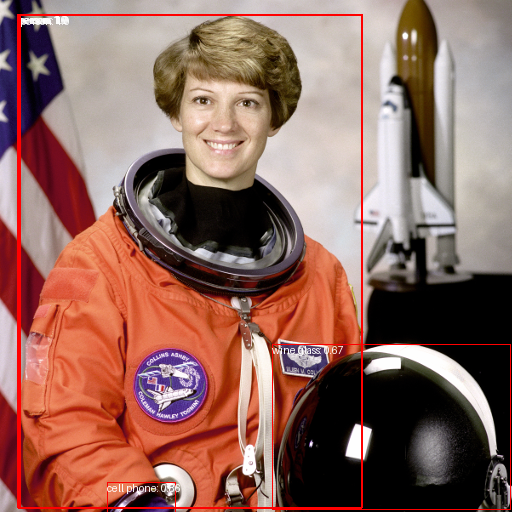

In [ ]:
from PIL import ImageDraw

draw = ImageDraw.Draw(image)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]

    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="white")

image

IMAGE to Text

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
import sys
import io

from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
import sys


def load_model():
    """Load the BLIP image captioning model."""
    print("Loading model...")
    processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
    model = BlipForConditionalGeneration.from_pretrained(
        "Salesforce/blip-image-captioning-base",
        tie_word_embeddings=False,  # silences tied-weights warnings
    )
    print("Model loaded!\n")
    return processor, model


def load_image(image_source: str) -> Image.Image:
    """Load an image from a URL or local file path."""
    if image_source.startswith("http://") or image_source.startswith("https://"):
        # Some hosts (e.g. Wikipedia) block requests without a User-Agent header
        headers = {"User-Agent": "Mozilla/5.0 (compatible; image-to-text-script/1.0)"}
        response = requests.get(image_source, headers=headers, timeout=10)
        response.raise_for_status()
        return Image.open(io.BytesIO(response.content)).convert("RGB")
    else:
        return Image.open(image_source).convert("RGB")


def image_to_text(image_source: str, processor, model, prompt: str = None) -> str:
    """
    Convert an image to text (caption).

    Args:
        image_source: A file path or URL to an image.
        processor:    The BLIP processor.
        model:        The BLIP model.
        prompt:       Optional text prompt to guide captioning (conditional mode).

    Returns:
        Generated caption string.
    """

    image = load_image(image_source)
    inputs = processor(image, prompt, return_tensors="pt") if prompt else processor(image, return_tensors="pt")
    output = model.generate(**inputs, max_new_tokens=50)
    caption = processor.decode(output[0], skip_special_tokens=True)
    return caption

In [ ]:
processor, model = load_model()

# --- Example 1: URL image (unconditional) ---
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/Cute_dog.jpg/320px-Cute_dog.jpg"
print(f"Image source : {url}")
url = "/content/11g.jpg"
caption = image_to_text(url, processor, model)
print(f"Caption      : {caption}\n")

# --- Example 2: URL image (conditional with a prompt) ---
prompt = "a photography of"
print(f"Image source : {url}")
print(f"Prompt       : {prompt}")
caption = image_to_text(url, processor, model, prompt=prompt)
print(f"Caption      : {caption}\n")


Loading model...


loading configuration file processor_config.json from cache at None
loading configuration file preprocessor_config.json from cache at /root/.cache/huggingface/hub/models--Salesforce--blip-image-captioning-base/snapshots/82a37760796d32b1411fe092ab5d4e227313294b/preprocessor_config.json
loading configuration file preprocessor_config.json from cache at /root/.cache/huggingface/hub/models--Salesforce--blip-image-captioning-base/snapshots/82a37760796d32b1411fe092ab5d4e227313294b/preprocessor_config.json
size should be a dictionary on of the following set of keys: ({'width', 'height'}, {'shortest_edge'}, {'shortest_edge', 'longest_edge'}, {'longest_edge'}, {'max_width', 'max_height'}), got 384. Converted to {'height': 384, 'width': 384}.
Image processor BlipImageProcessorFast {
  "data_format": "channels_first",
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_t

Loading weights:   0%|          | 0/473 [00:00<?, ?it/s]

Safetensors PR exists
The tied weights mapping and config for this model specifies to tie text_decoder.cls.predictions.bias to text_decoder.cls.predictions.decoder.bias, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie text_decoder.bert.embeddings.word_embeddings.weight to text_decoder.cls.predictions.decoder.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
BlipForConditionalGeneration LOAD REPORT from: Salesforce/blip-image-captioning-base
Key                                       | Status     |  | 
------------------------------------------+------------+--+-
text_decoder.bert.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok

Model loaded!

Image source : https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/Cute_dog.jpg/320px-Cute_dog.jpg
Caption      : a puppy laying in the grass

Image source : /content/11g.jpg
Prompt       : a photography of
Caption      : a photography of a puppy

